UNIVERSIDADE DO ESTADO DO AMAZONAS (UEA) - MICROECONOMIA II

Hal R. Varian - Microeconomia

Capítulo 25.2 - Demanda linear e Monopólio


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide


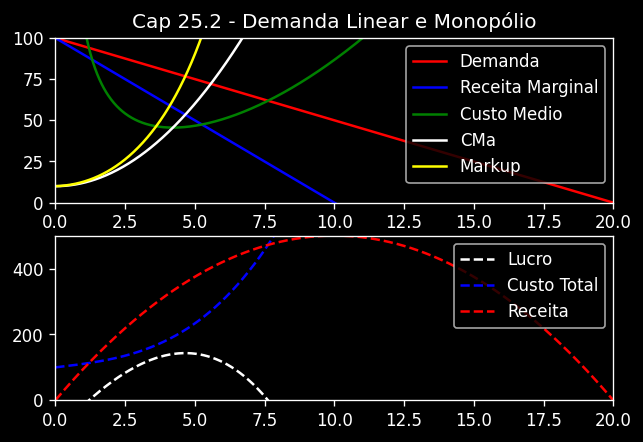

In [ ]:
### Universidade do Estado do Amazonas - UEA (Microeconomia II)
## Modelo de Otimização da Receita do Monopólio com uma Demanda linear

# Modulos usados
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# funcoes usadas
def bhaskara(a,b,c):
  r1 = (-b + (b**2 - 4 * a * c)**0.5)/(2 * a)
  r2 = (-b - (b**2 - 4 * a * c)**0.5)/(2 * a)

  return [r1,r2]

pd.options.mode.chained_assignment = None  # default='warn'

plt.style.use('dark_background')

# Sistema de Equações:
# Curva de Demanda Inversa Linear -> p(y) = a - by
# Função Receita -> r(y) = p(y)y = ay - by^2
# Função Receita Marginal -> RM(y) = a - 2by
# Função Custo Total -> c(y) = CF + 5*CV*y + (CV*y^3)/3
# Função Custo Marginal -> CMa(y) = 5*CV + CV^2

# Constantes usadas nas equações:
a = 100
b = 5
CF = 100 # custo fixo
CV = 2 # custo variavel
imposto = 2

# Modelo
y_otimo = max(bhaskara(CV,2*b,-a+5*CV))
y = np.linspace(0,a/b,1000)

dem_lin = a - b * y
receita = a * y - b * (y ** 2)
rec_marg = a - 2*b*y
c_total = CF + 5*CV*y + (CV*y**3)/3
c_medio = c_total / y
c_marginal = 5*CV + CV*y**2

lucro = receita - c_total

phi = 1 / (1 - abs(-b * (y/(a-b*y))))
oferta = phi * (c_marginal) # markup de lerner

# Dataframe
dataframe = pd.DataFrame()
dataframe['quant'] = y
dataframe['dem_lin'] = dem_lin
dataframe['receita'] = receita
dataframe['rec_marg'] = rec_marg
dataframe['c_total'] = c_total
dataframe['c_medio'] = c_medio
dataframe['c_marginal'] = c_marginal
dataframe['lucro'] = lucro

dataframe['oferta'] = oferta
dataframe['oferta'] = dataframe['oferta'].map(lambda s: None if s <= 0 else s)

# Gerando o gráfico
fig = plt.figure(dpi=120)
ax = plt.axes()
ax.grid(color='gray',linewidth=.2)

plt.subplot(2,1,1) # rows, columns, panel number

plt.title('Cap 25.2 - Demanda Linear e Monopólio')

plt.plot(dataframe['quant'], dataframe['dem_lin'],'-',color='red', label='Demanda')
plt.plot(dataframe['quant'], dataframe['rec_marg'],'-',color='blue', label='Receita Marginal')
plt.plot(dataframe['quant'], dataframe['c_medio'],'-',color='green', label='Custo Medio')
plt.plot(dataframe['quant'], dataframe['c_marginal'],'-',color='white', label='CMa')
plt.plot(dataframe['quant'], dataframe['oferta'],'-',color='yellow', label='Markup') # oferta do monopolista
plt.legend(loc='upper right')
plt.ylim(0,max(dataframe['dem_lin']))
plt.xlim(0,max(y))

plt.subplot(2,1,2) # rows, columns, panel number
plt.plot(dataframe['quant'], dataframe['lucro'],'--',color='white', label='Lucro')
plt.plot(dataframe['quant'], dataframe['c_total'],'--',color='blue', label='Custo Total')
plt.plot(dataframe['quant'], dataframe['receita'],'--',color='red', label='Receita')
plt.legend(loc='upper right')
plt.ylim(0,max(dataframe['receita']))
plt.xlim(0,max(y))

plt.show()
